****KNN****

In [3]:
import pandas as pd
import numpy as np
import cv2 as cv
import sklearn
import os
import matplotlib.pyplot as plt
import math
import pickle


f_0 function for loading images

In [4]:
from PIL import Image
import os
import numpy as np

def load_data(load_file_path):
    # Funktion zum Laden von Daten aus dem Ordner load_file_path als TIFF
    # Argument: load_file_path als String
    image_array = []  # Leeres Array zum Speichern der Bilder

    # Iteriere über die Dateien im Ordner
    for file_name in os.listdir(load_file_path):
        file_path = os.path.join(load_file_path, file_name)

        # Überprüfe, ob die Datei ein unterstütztes Bildformat hat
        if file_name.endswith(('.png', '.PNG', '.jpg', '.JPG', '.jpeg', '.JPEG', '.tiff', '.TIFF', '.tif', '.TIF')):
            # Lade das Bild mit PIL
            pil_image = Image.open(file_path)

            # Überprüfe den Datentyp des Bildes
            if isinstance(pil_image, np.ndarray):
                # Wenn das Bild bereits ein NumPy-Array ist, füge es direkt zum Array hinzu
                image_array.append(pil_image)
            else:
                # Wenn das Bild ein PIL Image-Objekt ist, konvertiere es in ein NumPy-Array und füge es hinzu
                image_array.append(np.array(pil_image))

    return image_array

f_1 function for plotting

In [5]:
import math
import matplotlib.pyplot as plt

def visualization_w_plt_subplots(array_images, array_titles, subplot_column_num, subplot_width, subplot_height):
    # This function is used to visualize the results using Matplotlib.
    # Visualization of results using Matplotlib
    row_num = math.ceil(len(array_images) / subplot_column_num)
    num_name = 0
    if len(array_titles)==0:
        array_titles = []
        for title in range(len(array_images)):
            title = str(num_name+1)
            array_titles.append(title)
            num_name = num_name + 1

    if row_num == 1 and subplot_column_num == 1:
        plt.figsize=(subplot_width, subplot_height)
        plt.imshow(array_images[0])
        plt.title(array_titles[0])
    else:
        if subplot_column_num == 1:
            # Create subplots with a single coloumn
            fig, axes = plt.subplots(row_num, 1, figsize=(subplot_width, subplot_height))
            for j in range(len(array_images)):
                axes[j].imshow(array_images[j])
                axes[j].set_title(array_titles[j])
        
        else:
            if row_num == 1 or row_num < 0:
                # Create subplots with a single row
                fig, axes = plt.subplots(1, subplot_column_num, figsize=(subplot_width, subplot_height))
                for j in range(len(array_images)):
                    axes[j].imshow(array_images[j])
                    axes[j].set_title(array_titles[j])
            else:
                # Create subplots with multiple rows
                fig, axes = plt.subplots(row_num, subplot_column_num, figsize=(subplot_width, subplot_height))

                for i in range(row_num):
                    start_index = i * subplot_column_num
                    end_index = min((i + 1) * subplot_column_num, len(array_images))
                    images = array_images[start_index:end_index]
                    titles = array_titles[start_index:end_index]

                    for j in range(len(images)):
                        axes[i, j].imshow(images[j])
                        axes[i, j].set_title(titles[j])

                    # Hide the remaining subplots if there are fewer than subplot_column_num images in the group
                    if len(images) < subplot_column_num:
                        for k in range(len(images), subplot_column_num):
                            axes[i, k].axis("off")

    plt.tight_layout()
    plt.show()

1.1 Funktion zur Erstellung der Konfusionsmatrix

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def key_metrics_generation(y_true, y_pred, title_cm, saving_file_path_cm):
    # Berechne die Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Berechne den Prozentsatz in der Confusion Matrix
    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100

    # Ausgabe der Confusion Matrix
    print("Confusion Matrix:")
    #print(cm)

    # Visualisierung der Confusion Matrix als Heatmap mit Prozentsätzen
    classes = np.unique(np.concatenate((y_true, y_pred)))
    plt.imshow(cm_percentage, interpolation='nearest', cmap=plt.cm.rainbow)
    plt.title(title_cm)
    plt.colorbar(label='Prozent')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Vorhersage')
    plt.ylabel('Wahre Werte')

    # Speichere die Confusion Matrix als Bild
    saving_file_path = os.path.join(saving_file_path_cm, title_cm)
    plt.savefig(saving_file_path)

    # Zeige die Confusion Matrix und die Metriken an
    plt.show()

    # Berechne die Precision, den Recall und den F1-Score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Konvertiere die Metriken in Prozentsatz von 0 bis 100
    precision_percentage = precision * 100
    recall_percentage = recall * 100
    f1_percentage = f1 * 100

    # Ausgabe der Metriken als Prozentsatz
    print("Precision: {:.2f}%".format(precision_percentage))
    print("Recall: {:.2f}%".format(recall_percentage))
    print("F1-Score: {:.2f}%".format(f1_percentage))

1.2 Einlesen der normalen Testdaten 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dateipfad unter dem die Testdaten abgespeichert sind
csv_file_path = r"D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\All_Labels_completed.csv"

# Lade die CSV-Datei in einen DataFrame und verwende die erste Zeile als Header
data_frame = pd.read_csv(csv_file_path, header=0)

# Annahme: Die Zielvariable befindet sich in der Spalte 'label'
# Annahme: Die Features befinden sich in den Spalten 'con_num', 'con_area', usw.
target_column = 'label'
feature_columns = ['con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown',
                    'mod_length', 'mod_length_wo_white', 'mod_area', 'mod_area_wo_white']  # Liste der aller Featurespalten
feature_columns = [ 'con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown'] # Liste der gewählten Featurespalten

# Extrahiere die Zielvariable y_all und die Features x_all aus dem DataFrame
y_all_test = data_frame[target_column]
x_all = data_frame.loc[:, feature_columns]
all = x_all.join(y_all_test)

# Teile die Daten in Trainings- und Testdaten auf
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all_test, test_size=0.2, random_state=1)

#bearbeiten der Trainingsdaten für einen funktionierenden KNN
distance = pd.DataFrame(np.zeros((x_test.shape[0], 1))) #hinzufügen einer Spalte zur Abspeicherung der Distanz der Vektoren
distance.columns = ["distance"]
x_test_knn = x_test.join(distance)
x_test_knn = x_test_knn.join(y_test)

1.3 Einlesen der Testdaten am Prüfungstag

In [8]:
# Dateipfade der CSV am Prüfungstag
csv_file_path_vdki = r"D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\Test\Testing_Data_CSV.csv"

# Lade die CSV-Datei in einen DataFrame und verwende die erste Zeile als Header
data_frame = pd.read_csv(csv_file_path_vdki, header=0)

# Annahme: Die Zielvariable befindet sich in der Spalte 'label'
# Annahme: Die Features befinden sich in den Spalten 'con_num', 'con_area', usw.
target_column = 'label'
feature_columns = ['con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown',
                    'mod_length', 'mod_length_wo_white', 'mod_area', 'mod_area_wo_white']  # Liste der aller Featurespalten
feature_columns = [ 'con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown'] # Liste der gewählten Featurespalten

# Extrahiere die Zielvariable y_all und die Features x_all aus dem DataFrame
y_all = data_frame[target_column]
x_all_vdki = data_frame.loc[:, feature_columns]
#all = x_all.join(y_all)

#für Testbilder am Dienstag
distance = pd.DataFrame(np.zeros((x_all.shape[0], 1))) #hinzufügen einer Spalte zur Abspeicherung der Distanz der Vektoren
distance.columns = ["distance"]
x_test_vdki = x_all_vdki.join(distance)
x_test_vdki = x_test_vdki.join(y_all)
y_test_vdki = y_all


1.4 Funktion zum Abspeichern und Laden des selbsterstellten KNN

In [9]:
#speichert das Modell als pickle-Datei unter dem Namen 'selftrained.pkl' im angegebenen Speicherpfad ab
def save(path, model):       
            with open(os.path.join(path,'selftrained.pkl'), 'wb') as file:
                pickle.dump(model, file)

#lädt das Modell mit dem Name 'selftrained.pkl' aus dem angegeben Dateipfad            
def load_model(path):
            with open(os.path.join(path,'selftrained.pkl'), 'rb') as file:
                return  pickle.load(file)

1.5 Klasse für das selbsterstellte KNN

In [10]:
class KNN :

    def __init__(self):
        self.reference_dataset = [] #alle bearbeiteten Daten aus der geladenen CSV in einem Dataframe
        self.X_train = [] #Trainingsdaten der Feautures
        self.Y_train =  [] #Trainingsdaten der Labels
        self.X_test = []    #Testdaten der Features
        self.Y_test = []    #Testdaten der Labels

   
    import pandas as pd
    from sklearn.model_selection import train_test_split

    #Funktion zum laden der Trainings und Testdaten aus einer CSV
    # Lade die CSV-Datei in einen DataFrame und verwende die erste Zeile als Header
    def load_csv(self, csv_file_path):
        data_frame = pd.read_csv(csv_file_path, header=0)

        # Annahme: Die Zielvariable befindet sich in der Spalte 'label'
        # Annahme: Die Features befinden sich in den Spalten 'con_num', 'con_area', usw.
        target_column = 'label'
        feature_columns = ['con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown',
                            'mod_length', 'mod_length_wo_white', 'mod_area', 'mod_area_wo_white']  # Liste der aller Featurespalten
        feature_columns = [ 'con_num', 'con_area', 'orb_num_front', 'orb_num_back', 'cs_green', 'cs_yellow', 'cs_white', 'cs_purple', 'cs_red', 'cs_blue', 'cs_brown'] # Liste der gewählten Featurespalten

        # Extrahiere die Zielvariable y_all und die Features x_all aus dem DataFrame
        y_all = data_frame[target_column]
        x_all = data_frame.loc[:, feature_columns]
        self.reference_dataset = x_all.join(y_all)
        
        # Teile die Daten in Trainings- und Testdaten auf
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=1)

        #bearbeiten der Trainingsdaten für einen funktionierenden KNN
        distance = pd.DataFrame(np.zeros((x_train.shape[0],1))) #hinzufügen einer Spalte zur Abspeicherung der Distanz der Vektoren
        distance.columns = ["distance"]
        self.X_train =self. X_train.join(distance) 
        self.X_train = self.X_train.join(self.Y_train)

        #bearbeiten der Trainingsdaten für einen funktionierenden KNN
        distance = pd.DataFrame(np.zeros((x_test.shape[0], 1))) #hinzufügen einer Spalte zur Abspeicherung der Distanz der Vektoren
        distance.columns = ["distance"]
        self.X_test = self.X_test.join(distance)
        self.X_test = self.X_test.join(self.Y_test)

    #Funktion zur Berechunng der Accuracy, gibt die accuracy, die vorhergesagten und die Anzahl er korrekten Klassifikatione zurück        
    def test_accuracy(self,X_test = None,Y_test = None):
        #falls keine Daten zum Testen angegeben wurden, wird auf die eigenen Testdaten zurückgegriffen
        if X_test is None or Y_test is None:
            X_test = self.X_test if X_test is None else X_test
            Y_test = self.Y_test if Y_test is None else Y_test  
        Y_pred =[] #speichert die erstellten Klassenvorhersagen
        counter_right = 0   #zählt die Anzahl der korrekten Klassenvorhersagen
        for i in range(0, X_test.shape[0]): #iteriert durch gesamte Testdaten durch
            pred = self.predict(X_test.iloc[[i],:12],2, reference = self.X_train)   #ruft die Funktion pred auf und übergibt den Testvektor, die Anzahl der nearest neighbours und den Trainingsdatensatz
            Y_pred.append(pred) #fügt die Klassenvorhersage zu Y_pred hinzu
            if pred[0] == Y_test.iloc[i]:   #vergleicht ob die Klassenvorhersage mit der Wahrheit übereinstimmt, falls ja wird der Counter um 1 erhöht
                counter_right = counter_right + 1

        accuracy = counter_right/X_test.shape[0] #berechnet die Accuracy des Testdatensatzes
        
        return accuracy, Y_pred, counter_right

    #Funktion zur Vorhersage der Klassen, gibt die vorhergesagten Klassen zurück
    def predict(self, X_test, num_neighbours , reference = None): # es werden der Testvektor, die Anzahl der nächsten zu betrachtenen Nachbarn und der Trainingsdatensatz benötigt
        if type(reference) == type(None): # falls keine Trainingsdatensatz angegeben wurde, wird der eigene verwendet
            reference = self.reference_dataset
        pred_classes = []   #Speicherort der Klassenvorhersagen
        for i in range(0, X_test.shape[0]):
            test_vector = np.array((X_test.iloc[i,:-1].tolist())) #-1 labels aus trainingdaten entfernt
            calc_dist = self.distance(reference, test_vector) # berechnet die Distanz von Testdaten zu Trainingsdaten
            n_smallest = calc_dist.nsmallest(num_neighbours, 'distance') # findet die nächsten Nachbarn
            category_count = n_smallest[calc_dist.columns[-1]].value_counts() # zählt die Anzahl der Labels der nächsten Nachbarn
            category_count = pd.DataFrame(category_count)
            pred_class =  category_count.idxmax() # sucht die Klasse mit den meisten gleichen Nachbarn
            pred_classes.append(pred_class[0]) #die vorhergesagte Klasse wird hier gespeichert
        return pred_classes
                               
    def distance(self,train_data, test_vector): #berechnet die Distanz zu jedem Trainingsvektor
        for i in range(0, train_data.shape[0]): #iteriert durch alle Trainngsdaten
            train_vector = np.array(train_data.iloc[i,:-2].tolist())    #umwandeln des Trainnigsvektors in ein numpy array
            p = train_vector - test_vector  #Berechnung der Differenz zwischen Trainingsvektor und Testvektor
            x = 0
            for j in range(0, p.shape[0]):  #in den folgenden Zeilen wird die Norm des Vektors p berechnet
                x = x + pow(p[j],2)
            d = np.sqrt(x)
            train_data.iloc[i,-2] = float(d) #die Norm wird als float in die Spalte 'distance'  zurückgegeben
        return train_data
        

**2 selbserstelltes KNN**

2.1 Modell trainiern und abspeichern

In [11]:
#Dateipfad zu den Trainigsdaten
csv_file_path = r"D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\All_Labels_completed.csv"
#erstellen eines Objekts der Klasse KNN
myKNN = KNN()
#laden der Trainingsdaten in myKNN
myKNN.load_csv(csv_file_path)
#speichern des Modells 
save(r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN', myKNN)


2.2 Laden und Trainieren des Modells

In [12]:
#laden des abgespeicherten Modells
KNN_2=load_model(r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN')
#Testdaten auf Modell anwenden
res, Y_pred, true_counter = KNN_2.test_accuracy(x_test_knn, y_test)


2.3 Erstellen der Konfusionsmatrix

Confusion Matrix:


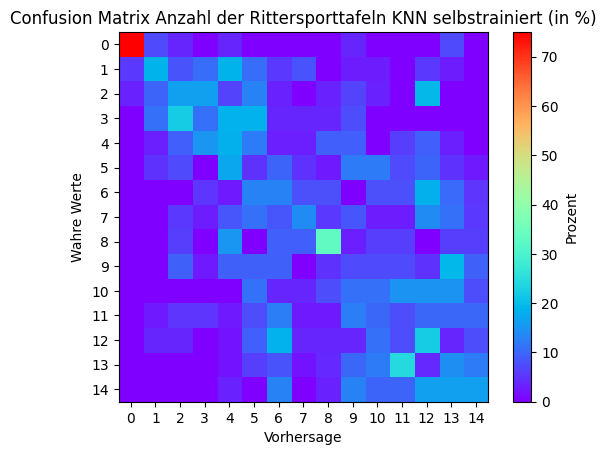

Precision: 19.47%
Recall: 17.92%
F1-Score: 18.42%
Accuracy: 17.92%


In [13]:
title_cm = 'Confusion Matrix Anzahl der Rittersporttafeln KNN selbstrainiert (in %)'
saving_file_path_confusionmatrix_knn_selfmade = r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN_v3'
Y_test_1d = np.squeeze(np.asarray(y_test))
Y_pred_1d = np.squeeze(np.asarray(Y_pred))

# Aufruf der Funktion mit angepassten Arrays
key_metrics_generation(Y_test_1d, Y_pred_1d, title_cm, saving_file_path_confusionmatrix_knn_selfmade)
print('Accuracy: {:.2f}%'.format(res*100))

**2.4 Prüfungstag**


2.4.1 selbserstelltes KNN mit Prüfungsbildern

In [15]:
#laden des abgespeicherten Modells
KNN_vdki=load_model(r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN')
#Testdaten auf Modell anwenden
res_vdki, Y_pred_vdki, true_counter_vdki = KNN_2.test_accuracy(x_test_vdki, y_test_vdki)

2.4.2 Konfusionsmatrix der Prüfungsbilder

In [16]:
title_cm_vdki = 'Confusion Matrix Anzahl der Rittersporttafeln KNN selbsttrainiert vdki(in %)'
saving_file_path_confusionmatrix_knn_selfmade_vdki = r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN_v3'
Y_test_1d = np.squeeze(np.asarray(y_test_vdki))
Y_pred_1d = np.squeeze(np.asarray(Y_pred_vdki))

# Aufruf der Funktion mit angepassten Arrays
key_metrics_generation(Y_test_1d, Y_pred_1d, title_cm_vdki, saving_file_path_confusionmatrix_knn_selfmade_vdki)

C:\Users\danie.DESKTOP-B0A7N4I\AppData\Local\Temp\ipykernel_18616\108604884.py:11: RuntimeWarning: invalid value encountered in divide
  cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100


Confusion Matrix:


Precision: 0.00%
Recall: 0.00%
F1-Score: 0.00%


c:\Users\danie.DESKTOP-B0A7N4I\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie.DESKTOP-B0A7N4I\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.4.3 Visualisierung der Vorhersagen

In [17]:
load_file_path = r"D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\Test_Bilder"
array_images_rgb = load_data(load_file_path)

y_predictions_titles_2 = []
for i in range(len(array_images_rgb)):
    title = "Prediction: " + str(Y_pred_vdki[i])
    y_predictions_titles_2.append(title)

visualization_w_plt_subplots(array_images_rgb, y_predictions_titles_2, 3, 15, 15)

**3 KNN aus der Bibliothek**

In [14]:
# Funktionen um KNN aus der Bibliothek abzuspeichern

def save_libmodel(path, KNN):
        with open(os.path.join(path,'libtrained.pkl'), 'wb') as file:
            pickle.dump(KNN, file)

def load_libmodel(path):
    with open(os.path.join(path,'libtrained.pkl'), 'rb') as file:
            knn = pickle.load(file)
    return knn

3.1 KNN aus der Bibliothek trainieren und speichern

In [15]:
from sklearn.neighbors import KNeighborsClassifier
saving_file_path_confusionmatrix_knn_lib = r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN_v3'
#Modell erstellen
classifier = KNeighborsClassifier(n_neighbors=2)
#Modell trainieren
classifier.fit(x_train, y_train)
#Model abspeichern
save_libmodel(saving_file_path_confusionmatrix_knn_lib, classifier)


3.2 KNN aus der Bibliothek laden und testen

In [16]:
#laden des trainierten Modells
KNN_lib = load_libmodel(r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN')
#Klassenvorhersage erstellen
Y_pred_lib = KNN_lib.predict(x_test)

from sklearn.metrics import accuracy_score
#accuracy bestimmen
accuracy = accuracy_score(y_test, Y_pred_lib)

3.3 Konfusionsmatrix erstellen

In [17]:
#Speicherpfad der Konfusionsmatrix
saving_file_path_confusionmatrix_knn_lib = r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN_v3'
#Titel der Konfusionsmatrix
title_cm_lib = 'Confusion Matrix Anzahl der Rittersporttafeln KNN sklearn (in %)'
#erstellen der Konfusionsmatrix
key_metrics_generation(y_test, Y_pred_lib, title_cm_lib, saving_file_path_confusionmatrix_knn_lib)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Confusion Matrix:


Precision: 20.90%
Recall: 18.28%
F1-Score: 18.17%
Accuracy: 18.28%


**3.4 Prüfungstag**

3.4.1 KNN laden und mit Pürfungsbilder trainieren

In [22]:
from sklearn.neighbors import KNeighborsClassifier
saving_file_path_confusionmatrix_knn_lib = r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN_v3'

#laden des trainierten Modells
KNN_lib_vdki = load_libmodel(r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN')
#Klassenvorhersage erstellen
Y_pred_lib_vdki = KNN_lib_vdki.predict(x_all_vdki)


from sklearn.metrics import accuracy_score
#accuracy bestimmen
accuracy = accuracy_score(y_test_vdki, Y_pred_lib_vdki)
print("Accuracy:", accuracy)
print("Y_pred_lib",Y_pred_lib_vdki)

Accuracy: 0.0
Y_pred_lib [1 4 8 5 2 2]


3.4.2 Konfusionsmatrix der Prüfungsbilder erstellen

In [23]:
#Speicherpfad der Konfusionsmatrix
saving_file_path_confusionmatrix_knn_lib_vdki = r'D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\KNN_v3'
#Titel der Konfusionsmatrix
title_cm_lib_vdki = 'Confusion Matrix Anzahl der Rittersporttafeln KNN sklearn vdki(in %)'
#erstellen der Konfusionsmatrix
key_metrics_generation(y_test_vdki, Y_pred_lib_vdki, title_cm_lib_vdki, saving_file_path_confusionmatrix_knn_lib_vdki)

C:\Users\danie.DESKTOP-B0A7N4I\AppData\Local\Temp\ipykernel_18616\108604884.py:11: RuntimeWarning: invalid value encountered in divide
  cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100


Confusion Matrix:


Precision: 0.00%
Recall: 0.00%
F1-Score: 0.00%


c:\Users\danie.DESKTOP-B0A7N4I\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie.DESKTOP-B0A7N4I\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3.4.3 Visualisierung der Vorhersage

In [24]:
load_file_path = r"D:\OneDrive - bwedu\HKA\1_Semester\Verfahren der künstlichen Intelligenz\Semesteraufgabe\Test_Bilder"
array_images_rgb = load_data(load_file_path)

y_predictions_titles = []
for i in range(len(array_images_rgb)):
    title = "Prediction: " + str(Y_pred_lib_vdki[i])
    y_predictions_titles.append(title)

visualization_w_plt_subplots(array_images_rgb, y_predictions_titles, 3, 15, 15)